In [1]:
import pandas as pd
import re 
import numpy as np

1. Lining up and mapping between CELEX and IPA syllables

In [2]:
subtlex = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/subtlex_v3_IPA_syllables.csv')
subtlex

Word  FREQcount  CDcount  FREQlow  CDlow  FREQlemma   SUBTLEXWF  \
0             ik    1744062     8054   778704   3125    1744527  39883.0334   
1             je    1600888     8060  1315051   6535    1600923  36608.9449   
2            het    1068396     8066   780771   5578    1913811  24431.9717   
3             de    1061177     8070   903872   6512    1063827  24266.8883   
4            dat     965424     8063   715570   6107     965431  22077.2184   
...          ...        ...      ...      ...    ...        ...         ...   
270349      aagh          1        1        0      0          1      0.0229   
270350    aagghh          1        1        0      0          1      0.0229   
270351  aagezien          1        1        1      1          1      0.0229   
270352       aaf          1        1        0      0          1      0.0229   
270353  aachener          1        1        0      0          1      0.0229   

            Zipf  SUBTLEXCD  Lg10CD dominant.pos  dominant.pos.freq  \
0       7.597064    99.8017  3.9061          VNW            1743609   
1       7.559864    99.8761  3.9064          VNW            1600798   
2       7.384235    99.9504  3.9067          VNW             735390   
3       7.381291   100.0000  3.9069          LID            1060098   
4       7.340221    99.9133  3.9066          VNW             532576   
...          ...        ...     ...          ...                ...   
270349  1.656532     0.0124  0.3010         SPEC                  1   
270350  1.656532     0.0124  0.3010            N                  1   
270351  1.656532     0.0124  0.3010           WW                  1   
270352  1.656532     0.0124  0.3010         SPEC                  1   
270353  1.656532     0.0124  0.3010         SPEC                  1   

       dominant.pos.lemma  dominant.pos.lemma.freq              all.pos  \
0                      ik                  1743944      .VNW.SPEC.N.VZ.   
1                      je                  1600798  .VNW.SPEC.N.BW.LID.   
2                     het                   735395  .VNW.LID.SPEC.WW.N.   
3                      de                  1062748    .LID.VNW.SPEC.VZ.   
4                     dat                   532576   .VNW.VG.SPEC.N.WW.   
...                   ...                      ...                  ...   
270349               aagh                        1               .SPEC.   
270350             aagghh                        1                  .N.   
270351             aazien                        1                 .WW.   
270352                aaf                        1               .SPEC.   
270353           aachener                        1               .SPEC.   

                   all.pos.freq            all.pos.lemma.freq Status  \
0             .1743609.448.4.1.           .1743944.448.134.1.   keep   
1           .1600798.72.15.2.1.           .1600798.72.50.2.1.   keep   
2       .735390.332929.53.22.2.  .735395.332929.53.845403.31.   keep   
3           .1060098.806.272.1.           .1062748.806.272.1.   keep   
4        .532576.432794.51.2.1.        .532576.432794.51.9.1.   keep   
...                         ...                           ...    ...   
270349                      .1.                           .1.   keep   
270350                      .1.                           .1.   keep   
270351                      .1.                           .1.   keep   
270352                      .1.                           .1.   keep   
270353                      .1.                           .1.   keep   

              IPA      Syllables  
0             ˈɪk             ɪk  
1             jˈə             jə  
2            hˈət            hət  
3             dˈə             də  
4            dˈɑt            dɑt  
...           ...            ...  
270349       ˈaːx            aːx  
270350       ˈaːx            aːx  
270351  ˌaːɣəzˈin  aː - ɣə - zin  
270352       ˈaːf            aːf  
270353   ˈaːxənər  aːx - ə - nər  

[270354 rows x 20 colum

In [3]:
subtlex_IPA = subtlex[['Word','Syllables','FREQcount','Zipf']]
subtlex_IPA.head()

Word Syllables  FREQcount      Zipf
0   ik        ɪk    1744062  7.597064
1   je        jə    1600888  7.559864
2  het       hət    1068396  7.384235
3   de        də    1061177  7.381291
4  dat       dɑt     965424  7.340221

In [4]:
# Load the CSV file
celex = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/dutch_celex_database_updatedv2.csv')

# Check the columns of the DataFrame
print(celex.columns)

# Assuming the correct column name is 'phone_full', if it is not, replace 'phone_full' with the correct column name
celex_syllables = celex[['Head', 'phone_full']]   

# Rename columns
celex_syllables = celex_syllables.rename(columns={'Head': 'Word', 'phone_full': 'CELEX'})

# Remove apostrophes (stress marks) from every entry in 'CELEX'
celex_syllables['CELEX'] = celex_syllables['CELEX'].str.replace("'", "")

# Display the first few rows
celex_syllables.head()

Index(['n_word', 'IdNum', 'Head', 'phone_full', 'syl_num', 'phone_num',
       'phone_clean', 'phone_CV', 'syl_num_sequence', 'phone_position_syl',
       'phone_position_syl_onc', 'phone_cluster_size',
       'phone_cluster_position', 'stress_pattern'],
      dtype='object')


Word      CELEX
0          a          a
1      Aagje      ax-j@
2       aagt        axt
3  aagtappel  axt-A-p@l
4        aai         aj

In [5]:
#merge the two dataframes on Word
merged = pd.merge(subtlex_IPA, celex_syllables, on='Word', how='inner')
#insert a space before and after every dash in the phone_full column
merged['CELEX'] = merged['CELEX'].str.replace("-", " - ")
#rename Syllables to IPA
merged = merged.rename(columns={'Syllables': 'IPA'})
#merged.to_csv('/home/neel/Desktop/MOUS_hierarchical-representations/merged-IPA_CELEX.csv', index=False)
merged

Word                    IPA  FREQcount      Zipf  \
0               ik                     ɪk    1744062  7.597064   
1               je                     jə    1600888  7.559864   
2              het                    hət    1068396  7.384235   
3               de                     də    1061177  7.381291   
4              dat                    dɑt     965424  7.340221   
...            ...                    ...        ...       ...   
47642   aanbidster       aːn - bɪt - stər          1  1.656532   
47643  aanbesteden  aːn - bə - steː - dən          1  1.656532   
47644  aanbelanden   aːn - bə - lɑn - dən          1  1.656532   
47645    aanbaksel        aːn - bɑk - səl          1  1.656532   
47646          aam                    aːm          1  1.656532   

                    CELEX  
0                      Ik  
1                      j@  
2                      @t  
3                      d@  
4                     dAt  
...                   ...  
47642     am - bIt - st@r  
47643  am - b@ - ste - d@  
47644  am - b@ - lAn - d@  
47645      am - bAk - s@l  
47646                  am  

[47647 rows x 5 columns]

In [6]:
#create an empty column for whether the number of syllables matches
merged['Equal # of Syllables'] = np.nan



Syllable comparison

In [7]:

syllables_mapping_master = {}
conflict_mapping_master = []
for row, word in enumerate(merged.iterrows()):
    Celex2IPA_syllables_mapping = {}
    IPA = word[1]['IPA']
    CELEX = word[1]['CELEX']
    # Split the IPA and CELEX strings into lists
    IPA_list = IPA.split(" - ")
    CELEX_list = CELEX.split(" - ")
    # If the number of syllables in the lists is equal, create a mapping
    if len(IPA_list) == len(CELEX_list):
        merged.at[row, 'Equal # of Syllables'] = True
        for i in range(len(IPA_list)):
            Celex2IPA_syllables_mapping[CELEX_list[i]] = IPA_list[i]
        # Concatenate the mappings for all words
        # If an entry already exists in the dictionary, check if the mapping is the same
        for key, value in Celex2IPA_syllables_mapping.items():
            if key in syllables_mapping_master:
                if syllables_mapping_master[key] != value:
                    print(f"Key {key} already exists in syllables_mapping_master with a different value.")
                    conflict_mapping_master.append((key, syllables_mapping_master[key], value))
            else:
                syllables_mapping_master[key] = value
    else:
        merged.at[row, 'Equal # of Syllables'] = False

Key war already exists in syllables_mapping_master with a different value.
Key Om already exists in syllables_mapping_master with a different value.
Key t@ already exists in syllables_mapping_master with a different value.
Key t@ already exists in syllables_mapping_master with a different value.
Key m@ already exists in syllables_mapping_master with a different value.
Key d@ already exists in syllables_mapping_master with a different value.
Key t@ already exists in syllables_mapping_master with a different value.
Key l@ already exists in syllables_mapping_master with a different value.
Key t@ already exists in syllables_mapping_master with a different value.
Key d@r already exists in syllables_mapping_master with a different value.
Key en already exists in syllables_mapping_master with a different value.
Key l@ already exists in syllables_mapping_master with a different value.
Key t@ already exists in syllables_mapping_master with a different value.
Key d@ already exists in syllables_m

In [8]:
#Check for convergence of syllable mapping conflicts (n = 37565)
#e.g if the same CELEX syllable maps to different IPA syllables
#eventually, pool: combine the frequency counts of all the IPA syllables that map to the same CELEX syllable
conflict_mapping_master # (CELEX, IPA1, IPA2)
#REFORMAT into a dictionary, where the first value in each tuple is the key, and the second and third values are the values. Merge all the entries which have the same key
conflict_mapping_dict = {}
for conflict in conflict_mapping_master:
    if conflict[0] in conflict_mapping_dict:
        conflict_mapping_dict[conflict[0]].append(conflict[1:])
    else:
        conflict_mapping_dict[conflict[0]] = [conflict[1:]]
#only keep unique values for each key
for key, value in conflict_mapping_dict.items():
    conflict_mapping_dict[key] = list(set(value))

#combine all the values for each key into a single list, then keep the unique elements
for key, value in conflict_mapping_dict.items():
    conflict_mapping_dict[key] = list(set([item for sublist in value for item in sublist]))
conflict_mapping_dict


{'war': ['ʋaːr', 'aːr', 'ʋaːrh', 'ʋaː'],
 'Om': ['rɔm',
  'sɔn',
  'dɔm',
  'tɔm',
  'rɔmh',
  'sɔm',
  'fɔm',
  'ɔm',
  'oː',
  'lɔmsx',
  'oːm',
  'ɔmz',
  'ɔmʋ',
  'ɔn',
  'lɔm',
  'ɔmh',
  'nɔm'],
 't@': ['ti',
  'tɛn',
  'tɛk',
  'tən',
  'tɛr',
  'tɛx',
  'təɲ',
  'tənh',
  'tɪː',
  'stər',
  'tə',
  'stɪː',
  'stən',
  'stəh',
  'tɛsx',
  'teːh',
  'stɛ',
  'tɛp',
  'tər',
  'stənt',
  'təŋ',
  'steːh',
  'teː',
  'steː',
  'təh',
  'stə',
  'stəŋ',
  'stɛŋ',
  'tɛɲ',
  'tɛŋ',
  'taː',
  'stɛn',
  'tɛ',
  'sti',
  'tɑ',
  'tɛnh'],
 'm@': ['meː',
  'mɛtʲ',
  'mɛx',
  'mɛz',
  'mə',
  'mɛ',
  'mɛk',
  'məŋ',
  'mi',
  'mɛnh',
  'smə',
  'meːh',
  'mɛn',
  'mɪː',
  'mɛŋ',
  'məɲ',
  'mən'],
 'd@': ['dəŋ',
  'dɛt',
  'tɛn',
  'tən',
  'døː',
  'dənsh',
  'dəl',
  'dər',
  'deːh',
  'dəŋk',
  'dɛsh',
  'dɛ',
  'dɛnʋ',
  'teː',
  'dɛnh',
  'dən',
  'dɛh',
  'dɛn',
  'deː',
  'dəh',
  'dək',
  'də',
  'dɪː',
  'dəs',
  'di',
  'dɪ'],
 'l@': ['lən',
  'lɪː',
  'ləŋk',
  'flə',
  'lɛtʲ',

In [9]:
num_keys = len(conflict_mapping_dict)
print(num_keys)

2510


In [10]:
#Number of syllabification conflicts (n = 6292)
merged[merged['Equal # of Syllables'] == False]


Word                          IPA  FREQcount      Zipf  \
16                zijn                      zɛ - ɪn     348446  6.897639   
28                 jij                       jɛ - ɪ     195527  6.646711   
31                mijn                      mɛ - ɪn     192935  6.640916   
99                kijk                      kɛ - ɪk      45906  6.017381   
108             altijd                 ɑl - tɛ - ɪt      42787  5.986824   
...                ...                          ...        ...       ...   
47629      aangrijnzen         aːn - ɣrɛ - ɪn - zən          1  1.656532   
47632    aangenaamheid    aːn - ɣə - naːmh - ɛ - ɪt          1  1.656532   
47637       aandweilen          aːnd - ʋɛ - ɪ - lən          1  1.656532   
47638       aandrijver          aːn - drɛ - ɪ - vər          1  1.656532   
47639  aandrijfsysteem  aːn - drɛ - ɪf - sɪ - steːm          1  1.656532   

                       CELEX Equal # of Syllables  
16                       zKn                False  
28                        jK                False  
31                       mKn                False  
99                       kKk                False  
108                 Al - tKt                False  
...                      ...                  ...  
47629         aN - GrKn - z@                False  
47632    aN - G@ - nam - hKt                False  
47637          an - dwK - l@                False  
47638         an - drK - v@r                False  
47639  an - drKf - sis - tem                False  

[6292 rows x 6 columns]

2. Frequencies of IPA Syllables

In [11]:
subtlex

Word  FREQcount  CDcount  FREQlow  CDlow  FREQlemma   SUBTLEXWF  \
0             ik    1744062     8054   778704   3125    1744527  39883.0334   
1             je    1600888     8060  1315051   6535    1600923  36608.9449   
2            het    1068396     8066   780771   5578    1913811  24431.9717   
3             de    1061177     8070   903872   6512    1063827  24266.8883   
4            dat     965424     8063   715570   6107     965431  22077.2184   
...          ...        ...      ...      ...    ...        ...         ...   
270349      aagh          1        1        0      0          1      0.0229   
270350    aagghh          1        1        0      0          1      0.0229   
270351  aagezien          1        1        1      1          1      0.0229   
270352       aaf          1        1        0      0          1      0.0229   
270353  aachener          1        1        0      0          1      0.0229   

            Zipf  SUBTLEXCD  Lg10CD dominant.pos  dominant.pos.freq  \
0       7.597064    99.8017  3.9061          VNW            1743609   
1       7.559864    99.8761  3.9064          VNW            1600798   
2       7.384235    99.9504  3.9067          VNW             735390   
3       7.381291   100.0000  3.9069          LID            1060098   
4       7.340221    99.9133  3.9066          VNW             532576   
...          ...        ...     ...          ...                ...   
270349  1.656532     0.0124  0.3010         SPEC                  1   
270350  1.656532     0.0124  0.3010            N                  1   
270351  1.656532     0.0124  0.3010           WW                  1   
270352  1.656532     0.0124  0.3010         SPEC                  1   
270353  1.656532     0.0124  0.3010         SPEC                  1   

       dominant.pos.lemma  dominant.pos.lemma.freq              all.pos  \
0                      ik                  1743944      .VNW.SPEC.N.VZ.   
1                      je                  1600798  .VNW.SPEC.N.BW.LID.   
2                     het                   735395  .VNW.LID.SPEC.WW.N.   
3                      de                  1062748    .LID.VNW.SPEC.VZ.   
4                     dat                   532576   .VNW.VG.SPEC.N.WW.   
...                   ...                      ...                  ...   
270349               aagh                        1               .SPEC.   
270350             aagghh                        1                  .N.   
270351             aazien                        1                 .WW.   
270352                aaf                        1               .SPEC.   
270353           aachener                        1               .SPEC.   

                   all.pos.freq            all.pos.lemma.freq Status  \
0             .1743609.448.4.1.           .1743944.448.134.1.   keep   
1           .1600798.72.15.2.1.           .1600798.72.50.2.1.   keep   
2       .735390.332929.53.22.2.  .735395.332929.53.845403.31.   keep   
3           .1060098.806.272.1.           .1062748.806.272.1.   keep   
4        .532576.432794.51.2.1.        .532576.432794.51.9.1.   keep   
...                         ...                           ...    ...   
270349                      .1.                           .1.   keep   
270350                      .1.                           .1.   keep   
270351                      .1.                           .1.   keep   
270352                      .1.                           .1.   keep   
270353                      .1.                           .1.   keep   

              IPA      Syllables  
0             ˈɪk             ɪk  
1             jˈə             jə  
2            hˈət            hət  
3             dˈə             də  
4            dˈɑt            dɑt  
...           ...            ...  
270349       ˈaːx            aːx  
270350       ˈaːx            aːx  
270351  ˌaːɣəzˈin  aː - ɣə - zin  
270352       ˈaːf            aːf  
270353   ˈaːxənər  aːx - ə - nər  

[270354 rows x 20 colum

In [12]:
IPA_syllables = subtlex['Syllables']
all_ipa_syllables = set()
for index, value in IPA_syllables.items():
    if pd.isna(value):
        continue
    word_syllables = [syl for syl in value.split("-") if isinstance(syl,str)]
    all_ipa_syllables.update(word_syllables)
IPA_syllables = pd.DataFrame(all_ipa_syllables, columns=['Syllables'])
IPA_syllables

Syllables
0          ksɪt
1          ɪdz 
2        bɑjns 
3           ɵp 
4         kvlaː
...         ...
37521     primt
37522     mɔnx 
37523    skaːr 
37524      roːm
37525   spɔrth 

[37526 rows x 1 columns]

In [13]:
#quick check to see how many CELEX syllables there are
celex_syllables 

Word      CELEX
0               a          a
1           Aagje      ax-j@
2            aagt        axt
3       aagtappel  axt-A-p@l
4             aai         aj
...           ...        ...
117232     zygoot     zi-Got
117233     zygote   zi-Go-t@
117234     zymase   zi-ma-z@
117235     zymose   zi-mo-z@
117236  zymotisch  zi-mo-tis

[117237 rows x 2 columns]

In [14]:
all_celex_syllables = set()
for index, row in celex_syllables.iterrows():
    value = row['CELEX']  # Replace 'Syllables' with the actual column name if different
    if pd.isna(value):
        continue
    word_syllables = [syl for syl in value.split("-") if isinstance(syl, str)]
    all_celex_syllables.update(word_syllables)

CELEX_syllables_df = pd.DataFrame(list(all_celex_syllables), columns=['Syllables'])
CELEX_syllables_df


Syllables
0           Md
1         G}rk
2          Egz
3          ram
4         lInt
...        ...
8746      hMdz
8747      sxEG
8748      stLd
8749     stElt
8750     nEnts

[8751 rows x 1 columns]

37526 > 8751. Interesting. 

Calculating Frequencies.

In [15]:
IPA_syllables['Cumulative FREQcount'] = None
IPA_syllables

Syllables Cumulative FREQcount
0          ksɪt                 None
1          ɪdz                  None
2        bɑjns                  None
3           ɵp                  None
4         kvlaː                 None
...         ...                  ...
37521     primt                 None
37522     mɔnx                  None
37523    skaːr                  None
37524      roːm                 None
37525   spɔrth                  None

[37526 rows x 2 columns]

In [ ]:
for index, row in IPA_syllables.iterrows():
    syllable = row['Syllables']
    contains_syllable = subtlex_IPA['Syllables'].str.contains(syllable, na=False)
    cumulative_FREQcount = subtlex_IPA[contains_syllable]['FREQcount'].sum()
    IPA_syllables.at[index,'Cumulative FREQcount'] = cumulative_FREQcount

/tmp/ipykernel_2174230/3403180887.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  contains_syllable = subtlex_IPA['Syllables'].str.contains(syllable, na=False)


In [ ]:
# Save IPA_syllables to a CSV file
IPA_syllables.to_csv('IPA_individual_syllable_frequencies.csv', index=False)

3. Calculate minimum syllable frequencies for all MOUS study words

In [19]:
import pandas as pd
IPA_syllables  = pd.read_csv('IPA_individual_syllable_frequencies.csv')
mous_ipa = pd.read_csv('MOUS_IPA_transcriptions.csv')

In [14]:
for index, row in mous_ipa.iterrows():
    word = row['Word']
    transcription = row['Syllables']
    print(f'{word} in IPA is {transcription}')
    
    # Split transcription into syllables
    transcription_syllables = transcription.split(" - ")
    
    longest_matches = {}
    for syllable in transcription_syllables:
        # Find rows in IPA_syllables where 'Syllables' is exactly the current syllable
        matches = IPA_syllables[IPA_syllables['Syllables'] == syllable]
        
        # Find the longest match (though in this case, it will be the same as the syllable)
        if not matches.empty:
            longest_match = matches.iloc[0]['Syllables']
            longest_matches[syllable] = longest_match
    
    for syllable in transcription_syllables:
        match = longest_matches.get(syllable, "")
        print(f'Syllable: {syllable}, Longest match: {match}')

toen in IPA is tun
Syllable: tun, Longest match: tun
die in IPA is di
Syllable: di, Longest match: di
de in IPA is də
Syllable: də, Longest match: də
barkeeper in IPA is bɑr - keː - pər
Syllable: bɑr, Longest match: bɑr
Syllable: keː, Longest match: keː
Syllable: pər, Longest match: pər
irritante in IPA is ɪɾ - ri - tɑn - tə
Syllable: ɪɾ, Longest match: ɪɾ
Syllable: ri, Longest match: ri
Syllable: tɑn, Longest match: tɑn
Syllable: tə, Longest match: tə
bediende in IPA is bə - din - də
Syllable: bə, Longest match: bə
Syllable: din, Longest match: din
Syllable: də, Longest match: də
wegliep in IPA is ʋɛ - ɣlip
Syllable: ʋɛ, Longest match: ʋɛ
Syllable: ɣlip, Longest match: ɣlip
manke in IPA is mɑŋ - kə
Syllable: mɑŋ, Longest match: mɑŋ
Syllable: kə, Longest match: kə
gingen in IPA is ɣɪŋ - ən
Syllable: ɣɪŋ, Longest match: ɣɪŋ
Syllable: ən, Longest match: ən
klant in IPA is klɑnt
Syllable: klɑnt, Longest match: klɑnt
dronkaard in IPA is drɔŋ - kaːrt
Syllable: drɔŋ, Longest match: drɔŋ
Syll

In [16]:
# Iterate over each row in mous_ipa
for index, row in mous_ipa.iterrows():
    word = row['Word']
    transcription = row['Syllables'].strip()
    print(f"{word} in IPA is {transcription}")
    
    # Split transcription into syllables and strip whitespace
    transcription_syllables = [syllable.strip() for syllable in transcription.split(" - ")]
    
    freq_counts = []  # List to store Cumulative FREQcount values
    for syllable in transcription_syllables:
        # Find the row in IPA_syllables where 'Syllables' equals the current syllable
        match = IPA_syllables[IPA_syllables['Syllables'].str.strip() == syllable]
        
        if not match.empty:
            # Get the 'Cumulative FREQcount' value
            freq_count = match.iloc[0]['CumulativeFREQcount']
            freq_counts.append(freq_count)
        else:
            # If no match is found, append 0 or None
            freq_counts.append(0)
            print(f"No match found for syllable: '{syllable}'")
    
    # Print the word and the array of Cumulative FREQcount values
    print(f"Word: '{word}', Cumulative FREQcounts: {freq_counts}")

toen in IPA is tun
Word: 'toen', Cumulative FREQcounts: [177]
die in IPA is di
Word: 'die', Cumulative FREQcounts: [441857]
de in IPA is də
Word: 'de', Cumulative FREQcounts: [195887]
barkeeper in IPA is bɑr - keː - pər
Word: 'barkeeper', Cumulative FREQcounts: [5468, 6764, 5498]
irritante in IPA is ɪɾ - ri - tɑn - tə
Word: 'irritante', Cumulative FREQcounts: [1105, 108273, 14939, 173653]
bediende in IPA is bə - din - də
Word: 'bediende', Cumulative FREQcounts: [20990, 20416, 195887]
wegliep in IPA is ʋɛ - ɣlip
Word: 'wegliep', Cumulative FREQcounts: [39901, 132]
manke in IPA is mɑŋ - kə
Word: 'manke', Cumulative FREQcounts: [77, 671009]
gingen in IPA is ɣɪŋ - ən
Word: 'gingen', Cumulative FREQcounts: [21253, 2449]
klant in IPA is klɑnt
Word: 'klant', Cumulative FREQcounts: [1855]
dronkaard in IPA is drɔŋ - kaːrt
Word: 'dronkaard', Cumulative FREQcounts: [6279, 197]
open in IPA is oː - pən
Word: 'open', Cumulative FREQcounts: [23008, 179814]
deuren in IPA is døː - rən
Word: 'deuren', C

In [17]:
# Initialize lists to store min, max, and mean frequency counts
min_freq_counts = []
max_freq_counts = []
mean_freq_counts = []

# Iterate over each row in mous_ipa
for index, row in mous_ipa.iterrows():
    word = row['Word']
    transcription = row['Syllables'].strip()
    print(f"{word} in IPA is {transcription}")
    
    # Split transcription into syllables and strip whitespace
    transcription_syllables = [syllable.strip() for syllable in transcription.split(" - ")]
    
    freq_counts = []  # List to store Cumulative FREQcount values
    for syllable in transcription_syllables:
        # Find the row in IPA_syllables where 'Syllables' equals the current syllable
        match = IPA_syllables[IPA_syllables['Syllables'].str.strip() == syllable]
        
        if not match.empty:
            # Get the 'CumulativeFREQcount' value
            freq_count = match.iloc[0]['CumulativeFREQcount']
            freq_counts.append(freq_count)
        else:
            # If no match is found, append 0
            freq_counts.append(0)
            print(f"No match found for syllable: '{syllable}'")
    
    # Calculate min, max, and mean of freq_counts
    if freq_counts:
        min_freq = min(freq_counts)
        max_freq = max(freq_counts)
        mean_freq = sum(freq_counts) / len(freq_counts)
    else:
        min_freq = max_freq = mean_freq = 0
    
    # Append the results to the lists
    min_freq_counts.append(min_freq)
    max_freq_counts.append(max_freq)
    mean_freq_counts.append(mean_freq)
    
    # Print the word and the array of Cumulative FREQcount values
    print(f"Word: '{word}', Cumulative FREQcounts: {freq_counts}")

# Add the min, max, and mean frequency counts as new columns to mous_ipa
mous_ipa['Min_Freq_Count'] = min_freq_counts
mous_ipa['Max_Freq_Count'] = max_freq_counts
mous_ipa['Mean_Freq_Count'] = mean_freq_counts

toen in IPA is tun
Word: 'toen', Cumulative FREQcounts: [177]
die in IPA is di
Word: 'die', Cumulative FREQcounts: [441857]
de in IPA is də
Word: 'de', Cumulative FREQcounts: [195887]
barkeeper in IPA is bɑr - keː - pər
Word: 'barkeeper', Cumulative FREQcounts: [5468, 6764, 5498]
irritante in IPA is ɪɾ - ri - tɑn - tə
Word: 'irritante', Cumulative FREQcounts: [1105, 108273, 14939, 173653]
bediende in IPA is bə - din - də
Word: 'bediende', Cumulative FREQcounts: [20990, 20416, 195887]
wegliep in IPA is ʋɛ - ɣlip
Word: 'wegliep', Cumulative FREQcounts: [39901, 132]
manke in IPA is mɑŋ - kə
Word: 'manke', Cumulative FREQcounts: [77, 671009]
gingen in IPA is ɣɪŋ - ən
Word: 'gingen', Cumulative FREQcounts: [21253, 2449]
klant in IPA is klɑnt
Word: 'klant', Cumulative FREQcounts: [1855]
dronkaard in IPA is drɔŋ - kaːrt
Word: 'dronkaard', Cumulative FREQcounts: [6279, 197]
open in IPA is oː - pən
Word: 'open', Cumulative FREQcounts: [23008, 179814]
deuren in IPA is døː - rən
Word: 'deuren', C

In [19]:
mous_ipa.to_csv('MOUS_IPA_SyllableFrequencies.csv')


In [24]:
mous_ipa

Word           IPA           Syllables  Min_Freq_Count  \
0           toen          tˈun                 tun             177   
1            die           dˈi                  di          441857   
2             de           dˈə                  də          195887   
3      barkeeper    bˈɑrkeːpər     bɑr - keː - pər            5468   
4      irritante   ˌɪɾritˈɑntə  ɪɾ - ri - tɑn - tə            1105   
...          ...           ...                 ...             ...   
1937     betalen     bətˈaːlən      bə - taː - lən            7556   
1938      intens       ˈɪntəns           ɪn - təns             575   
1939    jongeren      jˈɔŋərən       jɔŋ - ə - rən             932   
1940     plezier      pleːzˈir          pleː - zir            6109   
1941  woonplaats  ʋˈoːnplˌaːts       ʋoːn - plaːts              12   

      Max_Freq_Count  Mean_Freq_Count  
0                177       177.000000  
1             441857    441857.000000  
2             195887    195887.000000  
3               6764      5910.000000  
4             173653     74492.500000  
...              ...              ...  
1937           29153     19233.000000  
1938          655575    328075.000000  
1939         2276250    858348.666667  
1940           14759     10434.000000  
1941            2198      1105.000000  

[1942 rows x 6 columns]

In [ ]:
#Generate regressor files for every subject.

In [33]:
from pathlib import Path
source = Path('/media/neel/MOUS/MOUS/MOUS/SynologyDrive/source')
for subject in source.iterdir():
    if subject.name.startswith('sub-A'):
        events = subject / 'func' / f'{subject.name}_transcription.csv'
        events_df = pd.read_csv(events)
        events_df = events_df.rename(columns={'Transcription': 'Word'})
        combined_events = pd.merge(events_df, mous_ipa, on='Word')
        combined_events = combined_events.sort_values(by='AlignOnset', ascending=True)
        combined_events.to_csv(str(events.parent / f'{subject.name}_IPA_syllable_frequency.csv'))

Generate histograms of syllable frequencies.

In [54]:
celex_syllable_frequencies = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/syllable_counts.csv')
celex_syllable_frequencies.rename(columns={'Unnamed: 0': 'Syllable'}, inplace=True)
celex_syllable_frequencies['Lg10'] = np.log10(celex_syllable_frequencies['Count'])
celex_syllable_frequencies['Lg10'] = celex_syllable_frequencies['Lg10'].replace(-np.inf, 0)
#drop values with Count = 0
celex_syllable_frequencies = celex_syllable_frequencies[celex_syllable_frequencies['Count'] != 0]
celex_syllable_frequencies

/home/neel/anaconda3/envs/dti/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Syllable   Count      Lg10
0       'mEks   113.0  2.053078
1         vAN   312.0  2.494155
2       'krOk     2.0  0.301030
3      'sxrax     1.0  0.000000
4        'k}r   507.0  2.705008
...       ...     ...       ...
2285     'wKf  1049.0  3.020775
2287     zElv    46.0  1.662758
2288      blO   687.0  2.836957
2290      Gef    59.0  1.770852
2291    strLk    28.0  1.447158

[1731 rows x 3 columns]

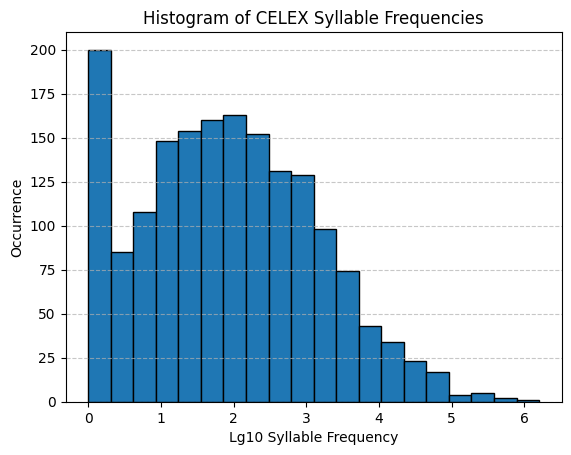

In [56]:
#histogram of celex_syllable_frequencies['Count']
import matplotlib.pyplot as plt

plt.hist(celex_syllable_frequencies['Lg10'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Lg10 Syllable Frequency')
plt.ylabel('Occurrence')
plt.title('Histogram of CELEX Syllable Frequencies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
conflict_mapping_dict

In [58]:
IPA_syllables = pd.read_csv('IPA_individual_syllable_frequencies.csv')
IPA_syllables

Syllables  CumulativeFREQcount
0          leːw                   12
1            ɵf                   19
2           oːh                 3686
3          ɵkst                   10
4          kərt                  923
...         ...                  ...
37521     mɑntl                    4
37522      tɑhn                    4
37523      fɑbr                    4
37524       ʃɪf                   12
37525     frind                    1

[37526 rows x 2 columns]

In [60]:
IPA_syllables['Lg10'] = np.log10(IPA_syllables['CumulativeFREQcount'])
IPA_syllables['Lg10'] = IPA_syllables['Lg10'].replace(-np.inf, 0)
IPA_syllables = IPA_syllables[IPA_syllables['CumulativeFREQcount'] != 0]
IPA_syllables

/home/neel/anaconda3/envs/dti/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Syllables  CumulativeFREQcount      Lg10
0          leːw                   12  1.079181
1            ɵf                   19  1.278754
2           oːh                 3686  3.566555
3          ɵkst                   10  1.000000
4          kərt                  923  2.965202
...         ...                  ...       ...
37521     mɑntl                    4  0.602060
37522      tɑhn                    4  0.602060
37523      fɑbr                    4  0.602060
37524       ʃɪf                   12  1.079181
37525     frind                    1  0.000000

[37474 rows x 3 columns]

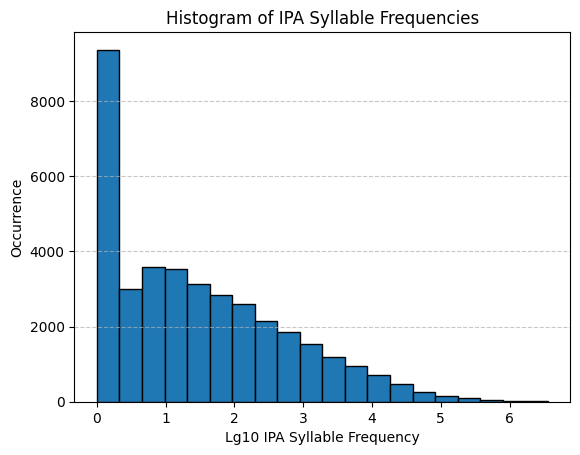

In [61]:
plt.hist(IPA_syllables['Lg10'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Lg10 IPA Syllable Frequency')
plt.ylabel('Occurrence')
plt.title('Histogram of IPA Syllable Frequencies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [63]:
#turn conflict_mapping_dict into a dataframe, with CELEX as the index and the values as a list in the second column
conflict_mapping_df = pd.DataFrame(conflict_mapping_dict.items(), columns=['CELEX', 'Possible IPA Mappings'])
conflict_mapping_df

CELEX                              Possible IPA Mappings
0      war                            [ʋaːr, ʋaː, ʋaːrh, aːr]
1       Om  [dɔm, rɔm, lɔmsx, ɔm, ɔmʋ, ɔmz, rɔmh, ɔmh, fɔm...
2       t@  [stəh, tɛk, stɛn, stə, steːh, təɲ, tɛnh, tɛ, t...
3       m@  [mən, mɪː, məɲ, mɛtʲ, mɛz, mɛx, mɛŋ, məŋ, smə,...
4       d@  [dɛsh, døː, dɛh, dɛn, dən, tən, də, deː, dəl, ...
...    ...                                                ...
2505   Alt                                          [ɑl, ɑlt]
2506   knE                                          [knɛ, nɛ]
2507   kna                                        [knaː, naː]
2508   ars                                        [aːrs, aːr]
2509  GrEn                                        [ɣrɛn, rɛn]

[2510 rows x 2 columns]

In [66]:
conflict_mapping_df['Sum of IPA FREQcounts'] = np.nan
for index, row in conflict_mapping_df.iterrows():
    sum_FREQcount = 0
    for IPA_syllable in row['Possible IPA Mappings']:
        frequency = IPA_syllables[IPA_syllables['Syllables'] == IPA_syllable]['CumulativeFREQcount']
        if not frequency.empty:
            sum_FREQcount += frequency.iloc[0]
    conflict_mapping_df.at[index, 'Sum of IPA FREQcounts'] = sum_FREQcount
    


In [68]:

conflict_mapping_df['Lg10 Sum of IPA FREQcounts'] = np.log10(conflict_mapping_df['Sum of IPA FREQcounts'])
conflict_mapping_df['Lg10 Sum of IPA FREQcounts'] = conflict_mapping_df['Lg10 Sum of IPA FREQcounts'].replace(-np.inf, 0)
conflict_mapping_df = conflict_mapping_df[conflict_mapping_df['Sum of IPA FREQcounts'] != 0]
conflict_mapping_df

CELEX                              Possible IPA Mappings  \
0      war                            [ʋaːr, ʋaː, ʋaːrh, aːr]   
1       Om  [dɔm, rɔm, lɔmsx, ɔm, ɔmʋ, ɔmz, rɔmh, ɔmh, fɔm...   
2       t@  [stəh, tɛk, stɛn, stə, steːh, təɲ, tɛnh, tɛ, t...   
3       m@  [mən, mɪː, məɲ, mɛtʲ, mɛz, mɛx, mɛŋ, məŋ, smə,...   
4       d@  [dɛsh, døː, dɛh, dɛn, dən, tən, də, deː, dəl, ...   
...    ...                                                ...   
2505   Alt                                          [ɑl, ɑlt]   
2506   knE                                          [knɛ, nɛ]   
2507   kna                                        [knaː, naː]   
2508   ars                                        [aːrs, aːr]   
2509  GrEn                                        [ɣrɛn, rɛn]   

      Sum of IPA FREQcounts  Lg10 Sum of IPA FREQcounts  
0                   71639.0                    4.855150  
1                 1396632.0                    6.145082  
2                 1635286.0                    6.213594  
3                  849534.0                    5.929181  
4                 1568944.0                    6.195607  
...                     ...                         ...  
2505               129002.0                    5.110596  
2506                21997.0                    4.342363  
2507               105265.0                    5.022284  
2508                  407.0                    2.609594  
2509                15202.0                    4.181901  

[2510 rows x 4 columns]

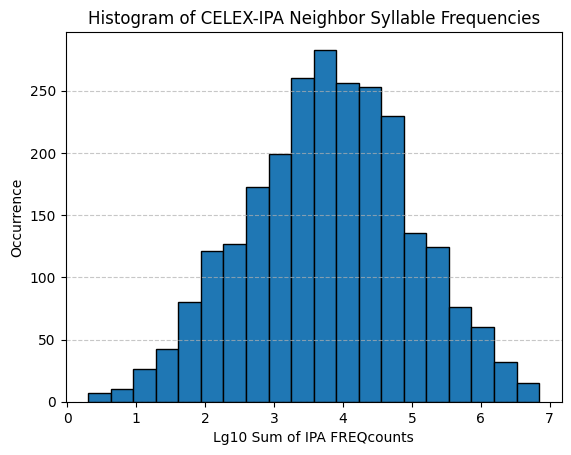

In [70]:
plt.hist(conflict_mapping_df['Lg10 Sum of IPA FREQcounts'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Lg10 Sum of IPA FREQcounts')
plt.ylabel('Occurrence')
plt.title('Histogram of CELEX-IPA Neighbor Syllable Frequencies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()